In [5]:
# import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%run utils/stat_helper_functions

packages imported


In [6]:
# read file
path = '/Users/mehipour/Desktop/data/'
file_path = path + 'R_lung_data_28-Sep-2020.csv'
df = pd.read_csv(file_path)

# remove space from column names and values
df.columns = df.columns.str.lstrip()
df['cohort'] = df['cohort'].str.lstrip()

# reivew data
df.head()

,rat,cohort,t_min,atp,ec,pi,total,atp2pi,atp2total,chi_sq,r_squred
0,20,Perfused,38.8500,234.5216,0.6266,214.0290,1437.4330,1.0000,1.0000,-212.3511,0.9543
1,20,Perfused,89.4167,194.6518,0.6604,215.3350,1236.7766,0.8250,0.9647,-124.3768,0.9262
2,20,Perfused,107.7833,194.6091,0.6386,246.9942,1236.1648,0.7191,0.9649,-97.7431,0.9276
3,20,Perfused,125.0500,167.0399,0.5835,269.8437,1291.7365,0.5649,0.7926,1344.6176,0.8989
4,20,Perfused,142.5333,179.2316,0.6085,282.4531,1353.8102,0.5791,0.8114,-167.2640,0.9201


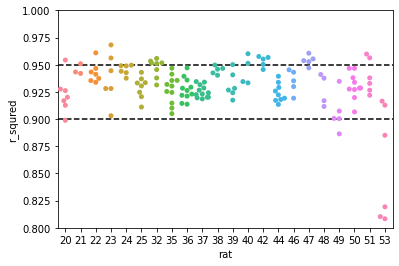

In [7]:
# check fit quality for rats
sns.swarmplot(x='rat', y='r_squred', size=5, data=df)
plt.axhline(0.95, ls='--', c=[0,0,0])
plt.axhline(0.9, ls='--', c=[0,0,0])
plt.ylim([0.8, 1.0])
plt.show()

In [15]:
# apply linear regression for each rat to get atp2pi, atp2total and ec slopes
lm_total = LinearRegression()
lm_pi = LinearRegression()
lm_ec = LinearRegression()

# get weights
rats = df['rat'].unique()
df_summary = pd.DataFrame(columns=['cohort', 'slope_atp2total', 'intercept_atp2total',
                                   'slope_atp2pi', 'intercept_atp2pi', 'slope_ec', 'intercept_ec'], index=rats)

df_goodfits = df[df['r_squred'] > 0.9]

# linear regression
for rat in rats:
    # time
    df_rat = df_goodfits[df_goodfits['rat'] == rat]
    t_hr = df_rat['t_min'].values.reshape(-1,1)/60
    # atp2total
    y = df_rat['atp2total'].values.reshape(-1,1)
    lm_total.fit(t_hr,y)
    # atp2pi
    y = df_rat['atp2pi'].values.reshape(-1,1)
    lm_pi.fit(t_hr,y)
    # ec
    y = df_rat['ec'].values.reshape(-1,1)
    lm_ec.fit(t_hr,y)
    cohort = df[df['rat']==rat]['cohort'].unique()[0]
    df_summary.loc[rat] = [cohort,
                           -lm_total.coef_[0][0], lm_total.intercept_[0],
                           -lm_pi.coef_[0][0], lm_pi.intercept_[0],
                           -lm_ec.coef_[0][0], lm_ec.intercept_[0]] 
df_summary.head()

,cohort,slope_atp2total,intercept_atp2total,slope_atp2pi,intercept_atp2pi,slope_ec,intercept_ec
20,Perfused,0.115703,1.11201,0.218549,1.1306,0.0184029,0.661775
21,Perfused,0.0438805,1.02605,0.203782,1.11059,-0.0433101,0.585242
22,Perfused,0.0439713,1.0058,0.152879,0.967821,-0.00676722,0.636271
23,Cold,0.0317654,1.03684,0.111275,0.995528,-0.00508242,0.602251
24,Cold,0.18698,1.19603,0.243219,1.06607,0.0605891,0.714906


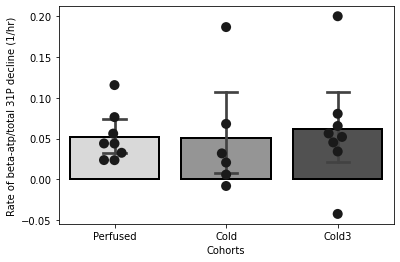

In [16]:
# show barplots for atp2total
ax = sns.barplot(x='cohort', y='slope_atp2total', 
                  capsize=0.2,
                  palette='Greys',
                  edgecolor='0.0',
                  linewidth=2,
                  data=df_summary)
ax = sns.swarmplot(x='cohort',y='slope_atp2total',
                    color = "0.1",
                    size = 10,
                    data=df_summary)
plt.ylabel('Rate of beta-atp/total 31P decline (1/hr)')
plt.xlabel('Cohorts')
plt.show()

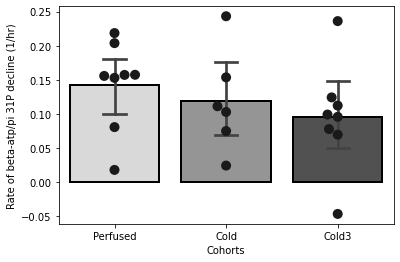

In [19]:
# show barplots for atp2pi
ax = sns.barplot(x='cohort', y='slope_atp2pi', 
                  capsize=0.2,
                  palette='Greys',
                  edgecolor='0.0',
                  linewidth=2,
                  data=df_summary)
ax = sns.swarmplot(x='cohort',y='slope_atp2pi',
                    color = "0.1",
                    size = 10,
                    data=df_summary)
plt.ylabel('Rate of beta-atp/pi 31P decline (1/hr)')
plt.xlabel('Cohorts')
plt.show()

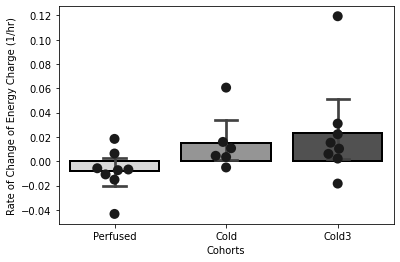

In [21]:
# show barplots for ec
ax = sns.barplot(x='cohort', y='slope_ec', 
                  capsize=0.2,
                  palette='Greys',
                  edgecolor='0.0',
                  linewidth=2,
                  data=df_summary)
ax = sns.swarmplot(x='cohort',y='slope_ec',
                    color = "0.1",
                    size = 10,
                    data=df_summary)
plt.ylabel('Rate of Change of Energy Charge (1/hr)')
plt.xlabel('Cohorts')
plt.show()

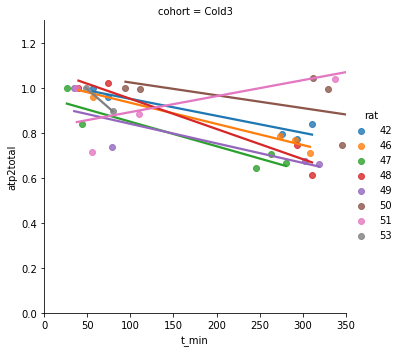

In [22]:
# look at individual decline of atp2total vs time for each group:
df_cold3 = df_goodfits[df_goodfits.cohort=='Cold3']
sns.lmplot(x='t_min', y='atp2total',
           hue='rat', col='cohort', ci=None, data=df_cold3)
plt.xlim([0,350])
plt.ylim([0,1.3])
plt.show()

In [24]:
df_cold3

,rat,cohort,t_min,atp,ec,pi,total,atp2pi,atp2total,chi_sq,r_squred
103,42,Cold3,56.4333,257.2110,0.7218,307.6217,1787.9369,1.0000,1.0000,-132.0908,0.9567
104,42,Cold3,73.5833,233.4885,0.6517,350.4713,1690.9721,0.7968,0.9598,1121.6926,0.9576
105,42,Cold3,276.4833,193.8253,0.6026,377.8851,1690.7169,0.6134,0.7969,853.8041,0.9503
106,42,Cold3,293.6333,196.9182,0.5870,399.1815,1770.5186,0.5900,0.7731,-8.5517,0.9552
107,42,Cold3,310.7833,222.9971,0.6173,436.2606,1841.5672,0.6113,0.8417,-73.1660,0.9456
108,46,Cold3,39.6333,197.5361,0.6631,131.2503,1128.8420,1.0000,1.0000,-9150.8774,0.9431
109,46,Cold3,56.7833,203.3526,0.6837,184.4216,1209.6338,0.7326,0.9607,7775.1663,0.9453
110,46,Cold3,274.0333,171.5658,0.6066,255.7146,1243.7745,0.4458,0.7883,-343.2258,0.9352
111,46,Cold3,308.3500,224.2345,0.6095,411.3226,1806.1355,0.3622,0.7095,557.6723,0.9192
112,46,Cold3,291.2000,182.5286,0.6143,268.6528,1355.3749,0.4514,0.7696,399.3350,0.9299


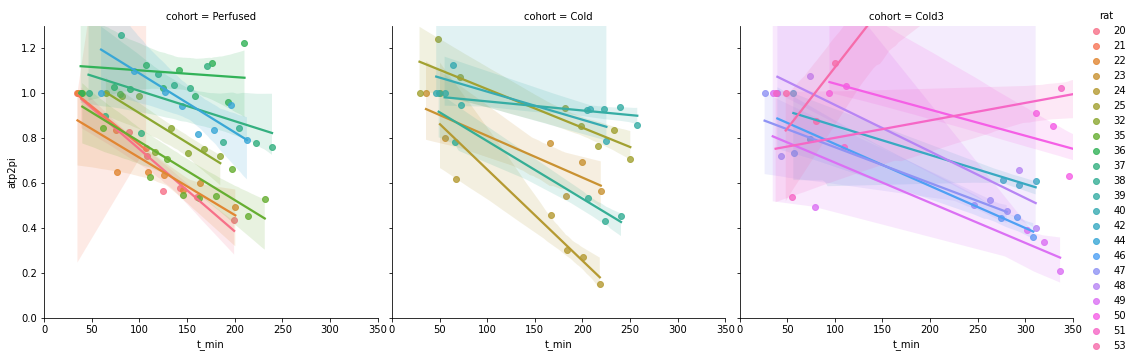

In [27]:
# look at individual decline of atp2pi vs time for each group:
df_cold3 = df[df.cohort=='Cold3']
sns.lmplot(x='t_min', y='atp2pi',
           hue='rat', col='cohort', ci=None, data=df)
plt.xlim([0,350])
plt.ylim([0,1.3])
plt.show()